#  Load Packages and Dataset

In [1]:
import sys
# config the path of your project
sys.path.append(r"F:\Lecture\Project\Project for Network IDS")

In [2]:
#importing packages that are necessary
from config import *

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline
from tqdm import tqdm
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [3]:
LIVE_DATASET_PATH

'..\\..\\dataset\\used\\live_data.csv'

In [4]:
#reading training data to understant existing features and dimentions of the same. 
data = pd.read_csv(LIVE_DATASET_PATH)
print(data.shape)
data.head(10) #printing the top 10 records

(99999, 45)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17152\2084212918.py:2: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(LIVE_DATASET_PATH)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,402569,0.140580,tcp,ssh,FIN,102,102,14616,17238,718.466720,...,1,2,0,0,0,2,1,0,NaN,0
1,534707,1.184566,tcp,http,FIN,14,18,1684,10168,10.976489,...,1,1,0,0,1,2,2,0,NaN,0
2,104396,0.000965,udp,dns,CON,2,2,130,162,1036.269471,...,1,1,0,0,0,2,4,0,NaN,0
3,528881,0.153902,tcp,-,FIN,40,40,2542,19502,253.464254,...,1,1,0,0,0,3,1,0,NaN,0
4,608721,0.319568,tcp,-,FIN,122,126,7810,15664,378.636961,...,1,1,0,0,0,2,11,0,NaN,0
5,479894,1.160658,tcp,-,FIN,14,18,1684,10168,11.202589,...,6,6,0,0,6,6,13,0,NaN,0
6,151254,0.008790,tcp,-,FIN,34,36,2230,14816,3755.286421,...,1,1,0,0,0,3,6,0,NaN,0
7,460816,1.931781,tcp,-,FIN,122,126,7812,14870,62.636761,...,5,6,0,0,0,8,15,0,NaN,0
8,286074,1.111859,tcp,http,FIN,12,14,1098,9104,9.898256,...,1,1,0,0,1,4,2,0,NaN,0
9,544565,25.765108,tcp,http,FIN,312,746,16706,1087900,12.070983,...,1,1,0,0,1,2,2,0,NaN,0


Rectangle(xy=(-0.4, 0), width=0.8, height=96826, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=3173, angle=0)
[    0.   9999.9 19999.8 29999.7 39999.6 49999.5 59999.4 69999.3 79999.2
 89999.1 99999. ]


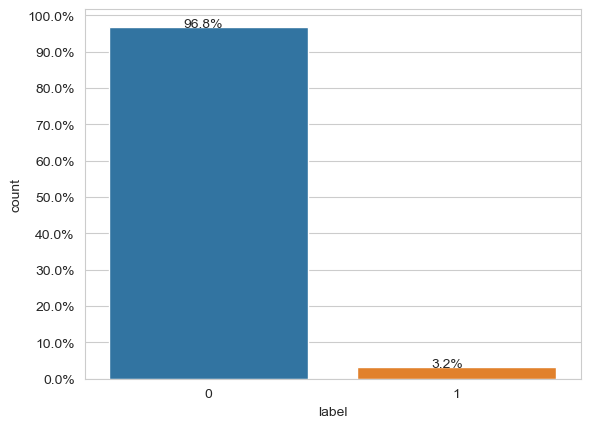

In [5]:
total = len(data)*1.
ax=sns.countplot(x="label", data=data)
for p in ax.patches:
    print(p)
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()+5))

#on y axis  from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
print(ax.yaxis.get_majorticklocs())
# with out changing the position converting to percentage on y axis without changing the positions. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

# Data Preprocessing

## Features

In [6]:
# description of all features
data_features =pd.read_csv(FEATURE_DATASET_PATH, sep=",", encoding='cp1252')
print(data_features.shape)
data_features.head(49)

(49, 4)


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [7]:
# categorical features
cat_feature = data.select_dtypes(include=['category', object]).columns
cat_feature

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [8]:
# understaing of numerical features/data/variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = data.drop(['id','label'], axis=1).select_dtypes(include=numerics).columns
num_features

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

## Split Training and Test Data

In [9]:
from sklearn.model_selection import train_test_split
X, y = data.iloc[:, :43], data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

## Dropping Highly Relevant Features

### Feature Correlation

In [10]:
# from the above graphs while understanding the density of numerical data  we see there is high corelation for certain features. 
# we shall find the highly corelated data and drop the columns to avoid overhead 
df_corr = X_train.corr()

plt.figure(figsize=(30,20))
sns.heatmap(df_corr, annot=True, cmap=plt.cm.viridis)
plt.savefig('figures/correlation_matrix.png')
plt.show()

ValueError: could not convert string to float: 'tcp'

### Drop Features Correlation Above 0.95

In [ ]:
from utils.graph_utils import *
fig_name = "figures/cor_matrix"
visualize_cor_matrix(fig_name, X_train)

In [ ]:
# we shall find the correlation above 0.95 andn shall drop the columns to avoid overhead  
high_corr_var=np.where(df_corr>0.95)
high_corr_var
# for x,y in zip(*high_corr_var):  解包操作符（unpacking operator）
#     print(x, y)
#calculate correlation betweena ll columns and remove highly correlated one
high_corr_var_pairs=[(df_corr.columns[x],df_corr.columns[y]) 
               for x,y in zip(*high_corr_var)
               if x!=y and x<y]
high_corr_var_pairs

In [ ]:
# Remove highly correlated features
corr_matrix = X_train.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
X_train = X_train.drop(to_drop, axis=1)

# Print summary of dropped features
print(f"Dropped {len(to_drop)} highly correlated features:")
for feature in to_drop:
    print(f"- {feature}")
    
# Print summary of remaining features
print(f"\n{len(X_train.columns)} features remaining:")
print(X_train.columns.tolist())


## Feature Mapping （category to numarical）

In [ ]:
#lets find any catagorial data and lable it usinng lable encoder  with out disturbing the shape/dimentions
cat_feature = X_train.select_dtypes(include=['category', object]).columns
cat_feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
X_train[cat_feature] = X_train[cat_feature].apply(LabelEncoder().fit_transform)
X_train.head()

In [ ]:
col_set = X_train.columns.tolist()
with open("txts/feature_selected.txt", "w") as file:
    file.write(str(list(col_set)))

Apply Blooms Filter betwen Rules genrated from orginal data and Live data (previously any)

For an initial round, we still apply blooms filter, code is designed in such a way that it stores the same rules generated from original data, which will nnot have any effect onn the first round. 

# ML Process

## Construct Dataset with Selected Features

Prepare Extracted train data  from Original Data D

2.1. Using the rules repository R obtained in step 1.3, 
extract the relevant features from the Original Data D and 
create a new Train data D' containing only these features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

X_test[cat_feature] = X_test[cat_feature].apply(LabelEncoder().fit_transform)
df_train = X_train[list(col_set)]
df_test = X_test[list(col_set)]

In [ ]:
df_train

In [ ]:
df_test

Train the Machine and Standardize the data

4.1. Train a machine learning model on the preprocessed D' obtained in step 2.1.

In [ ]:
from sklearn import preprocessing
x = df_train.values
x_test = df_test.values
std_scaler = preprocessing.MinMaxScaler()
std_scaler.fit(x)
x_scaled = std_scaler.transform(x)
df_train = pd.DataFrame(x_scaled)
x_scaled_test = std_scaler.transform(x_test)
df_test = pd.DataFrame(x_scaled_test)

In [ ]:
df_train.head()

In [ ]:
print("train data shape", df_train.shape, y_train.shape)
print("test data shape", df_test.shape, y_test.shape)

## Models

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
# from sklearn.datasets import make_classification
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer

# import xgboost as xgb
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier

In [ ]:
from pyod.models import lof, cblof, cof, pca, iforest, knn, mcd, ocsvm, abod, hbos, inne
# from pyod.models.feature_bagging import FeatureBagging 
from sklearn.metrics import log_loss, accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

In [ ]:
outliers_fraction = 0.05
# random_state = np.random.RandomState(42) 

classifiers = { 
#         'Angle-based Outlier Detector (ABOD)': abod.ABOD(contamination=outliers_fraction), 
        'Cluster-based Local Outlier Factor (CBLOF)':cblof.CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=1), 
#         'Feature Bagging':FeatureBagging(lof.LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,
# random_state=random_state), 
        'Histogram-base Outlier Detection (HBOS)': hbos.HBOS(contamination=outliers_fraction), 
        'Isolation Forest': iforest.IForest(contamination=outliers_fraction, random_state=1), 
        'Isolation-based Anomaly Detection Using Nearest-Neighbor Ensembles': inne.INNE(contamination=outliers_fraction, random_state=1)
#         'K Nearest Neighbors (KNN)': knn.KNN(contamination=outliers_fraction), 
#         'Average KNN': knn.KNN(method='mean',contamination=outliers_fraction) 
} 

metrics = defaultdict(list)

In [ ]:
# Acc of train: 0.41369
# F1_weighted of train: 0.40623
# Acc of test: 0.68055
# F1_weighted of train: 0.55322

In [ ]:
# df_train = df_train.iloc[:1000]
# y_test = pd.concat([y_test[y_test == 0].head(100), y_test[y_test == 1].head(100)])
# df_test = df_test.loc[y_test.index]

for i, (clf_name, clf) in enumerate(classifiers.items()): 
    clf.fit(df_train)
    y_predict = clf.predict(df_test)
    y_predict_tr = clf.predict(df_train)
    # compute metrics
    cm = confusion_matrix(y_test, y_predict)
    tn, fp, fn, tp = cm.ravel()
    fpr = fp/(fp+tn)*100
    fnr = fn/(fn+tp)*100
    far = (fpr+fnr)/2
    fpr_te, tpr_te, t_te = roc_curve(y_test, y_predict)
    auc_value = auc(fpr_te, tpr_te)
    metrics[clf_name].append(accuracy_score(y_test, y_predict))
    metrics[clf_name].append(f1_score(y_test, y_predict))
    metrics[clf_name].append(auc_value)
    metrics[clf_name].append(fpr)
    metrics[clf_name].append(fnr)
    metrics[clf_name].append(far)
    print(f"Training of {i} {clf_name} finished")
#     print(f'Acc of test: {accuracy_score(y_test, predictions):.5f}')
#     print(f"F1_weighted of train: {f1_score(y_test, predictions, average='weighted'):.5f}")
metrics

# Model Evaluation

In [ ]:
#Model Evaluation
import prettytable
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "F1 Score", "AUC","FPR %","FNR %","FAR %"]
for model_name, model_metrics_list in metrics.items():
    acc, f1, auc, fpr, fnr, far = model_metrics_list
    print(model_name, acc)
    x.add_row([model_name, "{0:.4f}".format(f1), "{0:.4f}".format(auc), "{:.2f}".format(fpr), "{:.2f}".format(fnr), "{:.2f}".format(far)])

print(x)

In [ ]:
import csv
csv_file_path = "csvs/model_evaluation.csv"
table_data = [
    ["Model", "F1 Score", "AUC", "FPR %", "FNR %", "FAR %"]
]

for model_name, model_metrics_list in metrics.items():
    table_data.append([model_name] + [round(value, 4) for value in model_metrics_list[1:]])

with open(csv_file_path, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(table_data)

print(f"Data has been written to {csv_file_path}")